In [1]:
import scanpy as sc
import anndata

In [2]:
adata_train_path= "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_train.h5ad"
adata_test_path= "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_test.h5ad"
adata_ood_path= "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_ood.h5ad"

In [3]:
adata_train = sc.read(adata_train_path)
adata_test = sc.read(adata_test_path)
adata_ood = sc.read(adata_ood_path)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
adata = anndata.concat((adata_train, adata_test, adata_ood))

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
adata

AnnData object with n_obs × n_vars = 63878 × 2000
    obs: 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'condition', 'pathway1', 'pathway2', 'split', 'control', 'cell_type', 'perturbation', 'cell_line', 'smiles_drug_1', 'smiles_drug_2'
    obsm: 'X_pca', 'X_umap', 'ecfp_drug_1', 'ecfp_drug_2'
    layers: 'counts'

In [6]:
sc.pp.neighbors(adata)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
sc.tl.umap(adata)

In [8]:
ood_conditions = ["Panobinostat+PCI-34051", "Dacinostat+Danusertib", "Givinostat+SRT1720", "Panobinostat+Curcumin", "SRT2104+Alvespimycin", "control"]

In [9]:
adata.obs["ood"] = adata.obs.apply(lambda x: x["condition"] if x["condition"] in ood_conditions else None, axis=1).astype("category")

In [10]:
adata.obs["split"]

Cell
A01_A02_RT_BC_10_Lig_BC_18    train
A01_A02_RT_BC_10_Lig_BC_25    train
A01_A02_RT_BC_10_Lig_BC_48    train
A01_A02_RT_BC_10_Lig_BC_51    train
A01_A02_RT_BC_10_Lig_BC_72    train
                              ...  
H12_A02_RT_BC_59_Lig_BC_54     test
H12_A02_RT_BC_60_Lig_BC_12     test
H12_A02_RT_BC_60_Lig_BC_38     test
H12_A02_RT_BC_60_Lig_BC_47     test
H12_A02_RT_BC_60_Lig_BC_51     test
Name: split, Length: 63878, dtype: category
Categories (3, object): ['ood', 'test', 'train']

In [11]:
def get_control_split(x):
    if x["perturbation"] == "control":
        if x["split"] == "test":
            return "c_test"
        if x["split"] == "train":
            return "c_train"
    return None

    
adata.obs["control_split"] = adata.obs.apply(get_control_split, axis=1)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


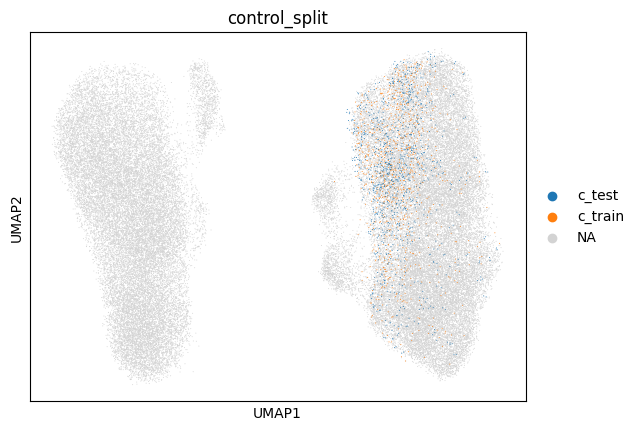

In [12]:
sc.pl.umap(adata, color="control_split")

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


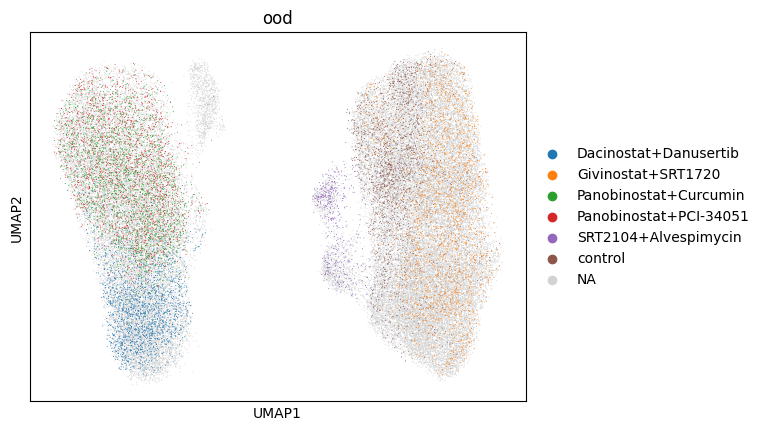

In [13]:

sc.pl.umap(adata, color="ood")

In [58]:
import pandas as pd
import os
out_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/out"
res_train = pd.read_csv(os.path.join(out_dir, "train_metrics_new.csv"))
res_test = pd.read_csv(os.path.join(out_dir, "test_metrics_new.csv"))
res_ood = pd.read_csv(os.path.join(out_dir, "ood_metrics_new.csv"))
                                                

In [59]:
res_train

,Unnamed: 0,Alvespimycin+Pirarubicin,Cediranib+PCI-34051,Dacinostat+Dasatinib,Dacinostat+PCI-34051,Givinostat+Carmofur,Givinostat+Cediranib,Givinostat+Crizotinib,Givinostat+Curcumin,Givinostat+Dasatinib,...,Panobinostat+SRT2104,Panobinostat+SRT3025,Panobinostat+Sorafenib,SRT3025+Cediranib,control+Alvespimycin,control+Dacinostat,control+Dasatinib,control+Givinostat,control+Panobinostat,control+SRT2104
0,r_squared,0.970499,0.952140,0.909087,0.934748,0.976565,0.946496,0.973696,0.946343,0.936861,...,0.991534,0.994227,0.986495,0.985310,0.959768,0.801437,0.528530,0.968516,0.924965,0.980111
1,sinkhorn_div_01,14.112503,12.049860,15.481931,14.925499,12.796082,13.066056,12.968998,12.849208,13.262882,...,16.119911,16.199076,16.455259,12.114519,12.974804,16.178690,15.385464,12.954593,18.224066,12.181864
2,e_distance,0.099929,0.081692,0.149256,0.130286,0.031212,0.075771,0.030585,0.047951,0.065304,...,0.073436,0.069757,0.101242,0.029277,0.121450,0.402866,0.423693,0.030510,0.449535,0.033266
3,mmd,0.519180,0.498161,0.819885,0.682892,0.184879,0.360695,0.193703,0.297874,0.409737,...,0.166800,0.190910,0.382816,0.175568,0.583374,2.151741,2.484715,0.261124,2.432060,0.168835


In [60]:
res_test

,Unnamed: 0,Alvespimycin+Pirarubicin,Cediranib+PCI-34051,Dacinostat+Dasatinib,Dacinostat+PCI-34051,Givinostat+Carmofur,Givinostat+Cediranib,Givinostat+Crizotinib,Givinostat+Curcumin,Givinostat+Dasatinib,...,Panobinostat+SRT2104,Panobinostat+SRT3025,Panobinostat+Sorafenib,SRT3025+Cediranib,control+Alvespimycin,control+Dacinostat,control+Dasatinib,control+Givinostat,control+Panobinostat,control+SRT2104
0,r_squared,0.949760,0.939601,0.889284,0.901317,0.953665,0.927850,0.898224,0.892157,0.889082,...,0.98437,0.983515,0.978723,0.976842,0.955802,0.822184,0.472299,0.965527,0.916255,0.975204
1,sinkhorn_div_01,15.943295,15.335580,18.318125,18.587576,15.846784,16.613749,16.421242,16.062838,16.680695,...,18.21958,18.561291,19.747311,15.748464,15.620800,18.694162,18.861109,15.864116,22.476139,15.333801
2,e_distance,0.154062,0.072132,0.158924,0.160783,0.030032,0.069439,0.060971,0.060374,0.083332,...,0.07250,0.093180,0.100961,0.012381,0.118416,0.352447,0.444493,0.006148,0.467843,0.006461
3,mmd,0.727976,0.594212,0.937210,0.960148,0.344898,0.576897,0.549580,0.578995,0.743977,...,0.35210,0.413540,0.575665,0.255215,0.572838,2.011414,2.626396,0.241810,2.576710,0.294102


In [61]:
res_ood

,Unnamed: 0,Dacinostat+Danusertib,Givinostat+SRT1720,Panobinostat+Curcumin,Panobinostat+PCI-34051,SRT2104+Alvespimycin
0,r_squared,0.325517,0.961226,0.920725,0.974240,0.879056
1,sinkhorn_div_01,17.365919,13.220532,17.914370,17.237442,15.173831
2,e_distance,0.603649,0.042351,0.263666,0.140117,0.229687
3,mmd,2.825764,0.183037,1.457432,0.648785,1.348011


In [62]:
r_test = res_test.set_index("Unnamed: 0").T

In [63]:
r_test

Unnamed: 0,r_squared,sinkhorn_div_01,e_distance,mmd
Alvespimycin+Pirarubicin,0.949760,15.943295,0.154062,0.727976
Cediranib+PCI-34051,0.939601,15.335580,0.072132,0.594212
Dacinostat+Dasatinib,0.889284,18.318125,0.158924,0.937210
Dacinostat+PCI-34051,0.901317,18.587576,0.160783,0.960148
Givinostat+Carmofur,0.953665,15.846784,0.030032,0.344898
Givinostat+Cediranib,0.927850,16.613749,0.069439,0.576897
Givinostat+Crizotinib,0.898224,16.421242,0.060971,0.549580
Givinostat+Curcumin,0.892157,16.062838,0.060374,0.578995
Givinostat+Dasatinib,0.889082,16.680695,0.083332,0.743977
Givinostat+SRT2104,0.946790,15.875574,0.022433,0.313580


In [64]:
r_ood = res_ood.set_index("Unnamed: 0").T

In [65]:
r_ood

Unnamed: 0,r_squared,sinkhorn_div_01,e_distance,mmd
Dacinostat+Danusertib,0.325517,17.365919,0.603649,2.825764
Givinostat+SRT1720,0.961226,13.220532,0.042351,0.183037
Panobinostat+Curcumin,0.920725,17.914370,0.263666,1.457432
Panobinostat+PCI-34051,0.974240,17.237442,0.140117,0.648785
SRT2104+Alvespimycin,0.879056,15.173831,0.229687,1.348011


In [67]:
r_ood["r_squared"].mean()

0.8121530933878125

In [68]:
res_test = res_test.drop("Unnamed: 0", axis=1)

In [69]:
res_test = res_test.T

In [70]:
res_test


,0,1,2,3
Alvespimycin+Pirarubicin,0.949760,15.943295,0.154062,0.727976
Cediranib+PCI-34051,0.939601,15.335580,0.072132,0.594212
Dacinostat+Dasatinib,0.889284,18.318125,0.158924,0.937210
Dacinostat+PCI-34051,0.901317,18.587576,0.160783,0.960148
Givinostat+Carmofur,0.953665,15.846784,0.030032,0.344898
Givinostat+Cediranib,0.927850,16.613749,0.069439,0.576897
Givinostat+Crizotinib,0.898224,16.421242,0.060971,0.549580
Givinostat+Curcumin,0.892157,16.062838,0.060374,0.578995
Givinostat+Dasatinib,0.889082,16.680695,0.083332,0.743977
Givinostat+SRT2104,0.946790,15.875574,0.022433,0.313580


In [25]:
adata_train

AnnData object with n_obs × n_vars = 51501 × 2000
    obs: 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'condition', 'pathway1', 'pathway2', 'split', 'control', 'cell_type', 'perturbation', 'cell_line', 'smiles_drug_1', 'smiles_drug_2'
    var: 'id', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Drug1_colors', 'Drug2_colors', 'Well_colors', 'condition_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pathway1_colors', 'pathway2_colors', 'pathway_colors', 'pca', 'rank_genes_groups', 'split_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'ecfp_drug_1', 'ecfp_drug_2'
    varm: 'PCs', 'X_train_mean'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [28]:
adata_test

AnnData object with n_obs × n_vars = 3100 × 2000
    obs: 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'condition', 'pathway1', 'pathway2', 'split', 'control', 'cell_type', 'perturbation', 'cell_line', 'smiles_drug_1', 'smiles_drug_2'
    var: 'id', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Drug1_colors', 'Drug2_colors', 'Well_colors', 'condition_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pathway1_colors', 'pathway2_colors', 'pathway_colors', 'pca', 'rank_genes_groups', 'split_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'ecfp_drug_1', 'ecfp_drug_2'
    varm: 'PCs', 'X_train_mean'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [29]:
adata_train.uns

{'Drug1_colors': array(['#1f77b4', '#279e68', '#8c564b', '#17becf', '#ffbb78', '#c49c94',
        '#9edae5'], dtype=object),
 'Drug2_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
        '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896',
        '#c5b0d5', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5'],
       dtype=object),
 'Well_colors': array(['#ff4a46', '#008941', '#006fa6', '#a30059', '#ffdbe5', '#7a4900',
        '#0000a6', '#63ffac', '#b79762', '#004d43', '#8fb0ff', '#997d87',
        '#1b4400', '#4fc601', '#3b5dff', '#4a3b53', '#ff2f80', '#61615a',
        '#ba0900', '#6b7900', '#00c2a0', '#ffaa92', '#ff90c9', '#b903aa',
        '#d16100', '#ddefff', '#000035', '#7b4f4b', '#a1c299', '#300018',
        '#372101', '#ffb500', '#c2ffed', '#a079bf', '#cc0744', '#c0b9b2',
        '#c2ff99', '#001e09', '#00489c', '#6f0062', '#0cbd66', '#eec3ff',
        '#456d75', '#b77b68', '#7a87a1', '#788d66', '#885578', '#fad09f',
        '#ff8a9a',

In [31]:
adata_train.uns['pca']['variance'].sum()

30.147203

In [34]:
adata_train.uns['pca']['variance_ratio'].sum()


0.3070595

In [35]:
import pertpy
adata = pertpy.data.combosciplex()

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [36]:
adata

AnnData object with n_obs × n_vars = 63378 × 27518
    obs: 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'condition', 'pathway1', 'pathway2', 'split', 'control', 'cell_type'
    var: 'id', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Drug1_colors', 'Drug2_colors', 'Well_colors', 'condition_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pathway1_colors', 'pathway2_colors', 'pathway_colors', 'pca', 'rank_genes_groups', 'split_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [37]:
sc.pp.normalize_total(adata)

In [38]:
sc.pp.log1p(adata)

In [52]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [53]:
cdata = adata[:,adata.var["highly_variable"]]

In [55]:
sc.pp.pca(cdata)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


In [56]:
cdata.uns['pca']['variance_ratio'].sum()

0.36580032

In [41]:
sc.pp.pca(adata, n_comps=100)

In [45]:
adata.uns['pca']['variance_ratio'].sum()

0.26549724

In [46]:
bdata = sc.read("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/adata_train.h5ad")

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [48]:
bdata.uns['pca']['variance_ratio'].sum()

0.49239621014334045

In [50]:
bdata.obsm['X_pca'].shape

(117148, 50)

In [45]:
res_test[0].mean()

0.22683783854680536

In [57]:
bdata.X[0,:].data

array([-7.0147775e-02,  1.0357201e+00, -3.5177637e-03, ...,
       -2.1543179e-05, -7.2365454e-03, -2.2746621e-04], dtype=float32)

In [67]:
[adata.obs["Drug1"]=="Panobinostat"]

AttributeError: 'list' object has no attribute 'values'

In [48]:
adata.obs["tmp"] = adata.obs.apply(lambda x: x["perturbation"] if x["perturbation"]=="control+Panobinostat" else None, axis=1)

In [59]:
(adata.obs["Drug1"]=="Panobinostat").sum()

16349

In [68]:
adata.obs["pan"] = adata.obs.apply(lambda x: x["perturbation"] if x["Drug1"]=="Panobinostat" else None, axis=1)

In [69]:
adata.obs["pan"].value_counts()

pan
Panobinostat+Curcumin        2244
Panobinostat+Sorafenib       2013
Panobinostat+SRT2104         1971
Panobinostat+Dasatinib       1955
Panobinostat+SRT3025         1889
Panobinostat+SRT1720         1826
Panobinostat+PCI-34051       1814
Panobinostat+Crizotinib      1641
Panobinostat+Alvespimycin     996
Name: count, dtype: int64

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid s

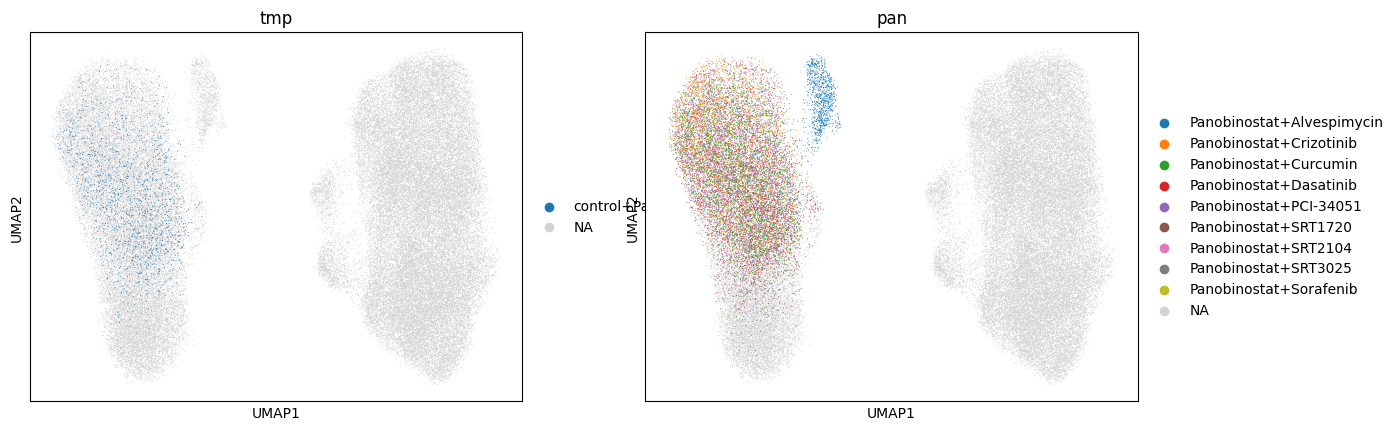

In [70]:
sc.pl.umap(adata, color=["tmp", "pan"])

In [ ]:
sc.pl.umap(adata, color=)

In [40]:
import seaborn as sns

In [ ]:
sns.barplot(res_test, )

In [ ]:
del res_test 

In [74]:
import numpy as np
q_1 = [0,1,2, 2]
q_2 = [1,2,3, 3]
q_3 = [2, 3,4, 4]

k_1 = [10, 30, 2, 4]
k_2 = [3, 24, 5, 2]
k_3 = [42, 42, 12, 3]


v_1 = [0,1,2, 55]
v_2 = [1,2,3, 5]
v_3 = [2, 33, 14 , 5]

Q = np.array([q_1, q_2, q_3])
K = np.array([k_1, k_2, k_3])
V = np.array([v_1, v_2, v_3])

Q = np.array([q_1, q_2, q_3])
K = np.array([k_1, k_2, k_3])
V = np.array([v_1, v_2, v_3])

A = np.matmul(Q, np.transpose(K))

np.matmul(A, V)

array([[ 182, 2494, 1206, 2860],
       [ 414, 5875, 2786, 6055],
       [ 646, 9256, 4366, 9250]])

In [75]:
Q.shape, K.shape, V.shape

((3, 4), (3, 4), (3, 4))

In [76]:
import numpy as np
q_1 = [0,1,2, 2]
q_3 = [1,2,3, 3]
q_2 = [2, 3,4, 4]

k_1 = [10, 30, 2, 4]
k_3 = [3, 24, 5, 2]
k_2 = [42, 42, 12, 3]


v_1 = [0,1,2, 55]
v_3 = [1,2,3, 5]
v_2 = [2, 33, 14 , 5]

Q = np.array([q_1, q_2, q_3])
K = np.array([k_1, k_2, k_3])
V = np.array([v_1, v_2, v_3])

Q = np.array([q_1, q_2, q_3])
K = np.array([k_1, k_2, k_3])
V = np.array([v_1, v_2, v_3])

A = np.matmul(Q, np.transpose(K))

np.matmul(A, V)

array([[ 182, 2494, 1206, 2860],
       [ 646, 9256, 4366, 9250],
       [ 414, 5875, 2786, 6055]])

In [71]:
adata

AnnData object with n_obs × n_vars = 63378 × 27518
    obs: 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'condition', 'pathway1', 'pathway2', 'split', 'control', 'cell_type'
    var: 'id', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Drug1_colors', 'Drug2_colors', 'Well_colors', 'condition_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pathway1_colors', 'pathway2_colors', 'pathway_colors', 'pca', 'rank_genes_groups', 'split_colors', 'umap', 'log1p'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [72]:
import sklearn

In [73]:
from sklearn.decomposition import PCA

In [ ]:
adata

In [74]:
pca = PCA(n_components=200)

In [75]:
pca.fit(adata.X.A)

PCA(n_components=200)

In [76]:
print(pca.explained_variance_ratio_)

[0.02226547 0.00631447 0.00491303 0.00303559 0.00195056 0.00169417
 0.00149149 0.00133977 0.0011642  0.0010797  0.00090661 0.00081944
 0.00076551 0.00070243 0.00067769 0.00065572 0.0006248  0.00054988
 0.00053533 0.00052826 0.00050977 0.00048306 0.00048085 0.00045882
 0.00045305 0.00044481 0.00042957 0.00042757 0.00041866 0.00041376
 0.00040376 0.00039634 0.00039322 0.00038544 0.00038484 0.00037215
 0.00037005 0.00036735 0.00036075 0.00035776 0.00035397 0.0003506
 0.00034589 0.00033849 0.00033297 0.00032915 0.00032543 0.00032451
 0.00032158 0.00031844 0.00031518 0.00031176 0.00030993 0.00030918
 0.00030638 0.0003019  0.00029962 0.00029644 0.00029536 0.00029275
 0.00029153 0.00028947 0.00028795 0.00028644 0.00028595 0.00028505
 0.00028465 0.00028415 0.00028271 0.00028247 0.00028153 0.00028091
 0.00028036 0.00028004 0.00027962 0.00027925 0.00027882 0.00027802
 0.00027776 0.00027739 0.00027704 0.00027614 0.00027594 0.00027546
 0.0002752  0.00027507 0.00027468 0.00027437 0.00027376 0.00027

In [77]:
pca.explained_variance_ratio_.sum()


0.10342629